In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Found GPU at: /device:GPU:0


In [50]:
!pip install h5py

ipywidgets 7.2.1 requires nbformat>=4.2.0, which is not installed.
ipywidgets 7.2.1 requires widgetsnbextension~=3.2.0, which is not installed.


In [31]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

In [4]:
filename = 'dog-breed-identification/labels.csv'
df = pd.read_csv(filename)
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
INPUT_SIZE = 150
NUM_CLASSES = 120
SEED = 223
data_dir = 'dog-breed-identification'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
print(len(listdir(join(data_dir, 'train'))), len(labels))
print(len(listdir(join(data_dir, 'test'))), len(sample_submission))


10222 10222
10358 10357


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

import os
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


In [7]:
df_train = pd.read_csv(join(data_dir, 'labels.csv'))
df_test = pd.read_csv(join(data_dir, 'sample_submission.csv'))

In [8]:
df_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [9]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [10]:
one_hot_labels = np.asarray(one_hot)

In [11]:
im_size = 150

In [12]:
x_train = []
y_train = []
x_test = []

In [13]:
i = 0 
for f, breed in tqdm(df_train.values):
    img = cv2.imread('dog-breed-identification/train/{}.jpg'.format(f))
    label = one_hot_labels[i]
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(label)
    i += 1

100%|██████████| 10222/10222 [04:35<00:00, 37.15it/s]


In [14]:
for f in tqdm(df_test['id'].values):
    img = cv2.imread('dog-breed-identification/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|██████████| 10357/10357 [04:36<00:00, 37.39it/s]


In [15]:
y_train_raw = np.array(y_train, np.uint8)
x_train_raw = np.array(x_train, np.float32) / 255.
x_test  = np.array(x_test, np.float32) / 255.

In [29]:
print(x_train_raw.shape)
print(y_train_raw.shape)
print(x_test.shape)

(10222, 150, 150, 3)
(10222, 120)
(10357, 150, 150, 3)


In [25]:
#save these arrays as pickle files in case kernel stops
import pickle

In [26]:
output = open('xtrainraw.pkl', 'wb')
pickle.dump(x_train_raw, output)
output.close()
!ls

colabtestjh_dogstart-Copy1.ipynb  Dogs_Start-Copy1.ipynb  test
colabtestjh_dogstart-Copy2.ipynb  Dogs_Start.ipynb	  x_train_raw.csv
colabtestjh_dogstart.ipynb	  examples		  xtrainraw.pkl
courses				  May Dogs.ipynb
dog-breed-identification	  README.txt


In [27]:
output = open('ytrainraw.pkl', 'wb')
pickle.dump(y_train_raw, output)
output.close()
!ls

colabtestjh_dogstart-Copy1.ipynb  Dogs_Start-Copy1.ipynb  test
colabtestjh_dogstart-Copy2.ipynb  Dogs_Start.ipynb	  x_train_raw.csv
colabtestjh_dogstart.ipynb	  examples		  xtrainraw.pkl
courses				  May Dogs.ipynb	  ytrainraw.pkl
dog-breed-identification	  README.txt


In [28]:
output = open('xtest.pkl', 'wb')
pickle.dump(x_test, output)
output.close()
!ls

colabtestjh_dogstart-Copy1.ipynb  Dogs_Start-Copy1.ipynb  test
colabtestjh_dogstart-Copy2.ipynb  Dogs_Start.ipynb	  xtest.pkl
colabtestjh_dogstart.ipynb	  examples		  x_train_raw.csv
courses				  May Dogs.ipynb	  xtrainraw.pkl
dog-breed-identification	  README.txt		  ytrainraw.pkl


In [ ]:
#reading back pickle
import pprint, pickle

pkl_file = open('xtrainraw.pkl', 'rb')

x_train_raw = pickle.load(pkl_file)
pprint.pprint(x_train_raw)

pkl_file.close()

In [17]:
#120 Breeds in the class
num_class = y_train_raw.shape[1]

In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw,
                                                      y_train_raw,
                                                      test_size=0.3,
                                                      random_state=1)

In [40]:
# Create the base pre-trained model
# Can't download weights in the kernel
base_model = VGG19(weights='imagenet', 
                   include_top=False, 
                   input_shape=(im_size, im_size, 3))



In [41]:
# Add a new top layer
x = base_model.output
x = Conv2D(32, 3, padding='same')(x)
x = (Activation('relu'))(x)
x = (BatchNormalization())(x)
x = (Conv2D(32, 3, padding='same'))(x)
x = (BatchNormalization())(x)
x = (Activation('relu'))(x)
x = (MaxPooling2D(pool_size=(2, 2)))(x)
x = (Dropout(0.5))(x)
x = (Flatten())(x)
x = (Dense(256))(x)
x = (Activation('relu'))(x)
x = (BatchNormalization())(x)
x = (Dropout(0.5))(x)
x = (Dense(64))(x)
x = (Activation('relu'))(x)
x = (BatchNormalization())(x)
x = Dropout(0.5)(x)
predictions = Dense(num_class, activation='softmax')(x)

In [51]:
from keras.optimizers import Adam
# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False
    
lr = 1e-6
adam = Adam(lr)
ep = 15

model.compile(loss='categorical_crossentropy', 
              optimizer= adam, 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [52]:
#Checkpoint Neural Network Model Improvements
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [54]:
import time
# Fit the model
t0=time.time()
log3 = model.fit(X_train, 
                 Y_train, 
                 epochs=ep, 
                 validation_data=(X_valid, Y_valid),
                 callbacks=callbacks_list,
                 verbose=1)
t1=time.time()
print(t1-t0," seconds")

Train on 7155 samples, validate on 3067 samples
Epoch 1/15
7155/7155 [==============================] - 62s 9ms/step - loss: 5.2013 - acc: 0.0108 - val_loss: 4.8024 - val_acc: 0.0104

Epoch 00001: val_acc improved from -inf to 0.01043, saving model to weights-improvement-01-0.01.hdf5
Epoch 2/15
7155/7155 [==============================] - 62s 9ms/step - loss: 5.1923 - acc: 0.0116 - val_loss: 4.8021 - val_acc: 0.0108

Epoch 00002: val_acc improved from 0.01043 to 0.01076, saving model to weights-improvement-02-0.01.hdf5
Epoch 3/15
7155/7155 [==============================] - 62s 9ms/step - loss: 5.1890 - acc: 0.0122 - val_loss: 4.8012 - val_acc: 0.0108

Epoch 00003: val_acc did not improve from 0.01076
Epoch 4/15
7155/7155 [==============================] - 62s 9ms/step - loss: 5.2043 - acc: 0.0102 - val_loss: 4.8013 - val_acc: 0.0111

Epoch 00004: val_acc improved from 0.01076 to 0.01109, saving model to weights-improvement-04-0.01.hdf5
Epoch 5/15
7155/7155 [===========================

CNN Error: 98.92%


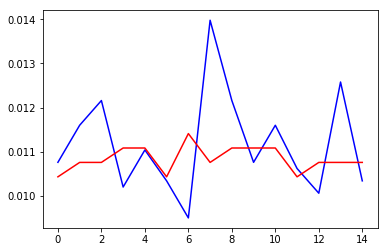

In [55]:
scores3 = model.evaluate(X_valid, Y_valid, verbose=0)
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

In [56]:
base_model = VGG19(weights='imagenet', 
                   include_top=False, 
                   input_shape=(im_size, im_size, 3))

In [57]:
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

In [58]:
# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [59]:
#Change checkpoint filepath to B
filepath="weights-improvementB-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [60]:
t0=time.time()
log3 = model.fit(X_train, Y_train, 
                 epochs=15,
                 callbacks=callbacks_list,
                 validation_data=(X_valid, Y_valid), 
                 verbose=1)
t1=time.time()
print(t1-t0," seconds")

Train on 7155 samples, validate on 3067 samples
Epoch 1/15
7155/7155 [==============================] - 61s 8ms/step - loss: 4.5574 - acc: 0.0935 - val_loss: 3.9671 - val_acc: 0.1585

Epoch 00001: val_acc improved from -inf to 0.15846, saving model to weights-improvementB-01-0.16.hdf5
Epoch 2/15
7155/7155 [==============================] - 60s 8ms/step - loss: 2.1101 - acc: 0.4929 - val_loss: 3.7527 - val_acc: 0.1911

Epoch 00002: val_acc improved from 0.15846 to 0.19107, saving model to weights-improvementB-02-0.19.hdf5
Epoch 3/15
7155/7155 [==============================] - 61s 8ms/step - loss: 1.1457 - acc: 0.7487 - val_loss: 3.7841 - val_acc: 0.1976

Epoch 00003: val_acc improved from 0.19107 to 0.19759, saving model to weights-improvementB-03-0.20.hdf5
Epoch 4/15
7155/7155 [==============================] - 61s 9ms/step - loss: 0.6640 - acc: 0.8878 - val_loss: 3.7178 - val_acc: 0.1950

Epoch 00004: val_acc did not improve from 0.19759
Epoch 5/15
7155/7155 [========================

CNN Error: 77.86%


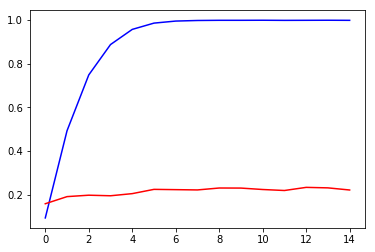

In [61]:
scores3 = model.evaluate(X_valid, Y_valid, verbose=0)
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

### This model is overfitting, however lets save it and see if we can later improve it... 
# Best weights = weights-improvementB-09-0.23.hdf5

## We have the weights saved, now save the model to recall

In [62]:
# serialize model to JSON
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
model_json = model.to_json()
with open("modelVGGJH1.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

Saved model to disk


In [ ]:
# How to load this back later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# Switch from flatten to global

In [65]:
from keras.layers import GlobalAveragePooling2D
base_model = VGG19(weights='imagenet', 
                   include_top=False, 
                   input_shape=(im_size, im_size, 3))

In [67]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_class, activation='softmax')(x)

In [68]:
# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [69]:
#Change checkpoint filepath to B
filepath="weights-improvementG-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [70]:
t0=time.time()
log3 = model.fit(X_train, Y_train, 
                 epochs=15,
                 callbacks=callbacks_list,
                 validation_data=(X_valid, Y_valid), 
                 verbose=1)
t1=time.time()
print(t1-t0," seconds")

Train on 7155 samples, validate on 3067 samples
Epoch 1/15
7155/7155 [==============================] - 60s 8ms/step - loss: 4.6968 - acc: 0.0333 - val_loss: 4.5322 - val_acc: 0.0577

Epoch 00001: val_acc improved from -inf to 0.05771, saving model to weights-improvementG-01-0.06.hdf5
Epoch 2/15
7155/7155 [==============================] - 60s 8ms/step - loss: 4.3387 - acc: 0.0948 - val_loss: 4.3039 - val_acc: 0.0913

Epoch 00002: val_acc improved from 0.05771 to 0.09129, saving model to weights-improvementG-02-0.09.hdf5
Epoch 3/15
7155/7155 [==============================] - 60s 8ms/step - loss: 4.0891 - acc: 0.1474 - val_loss: 4.1500 - val_acc: 0.1246

Epoch 00003: val_acc improved from 0.09129 to 0.12455, saving model to weights-improvementG-03-0.12.hdf5
Epoch 4/15
7155/7155 [==============================] - 61s 8ms/step - loss: 3.8897 - acc: 0.1800 - val_loss: 4.0193 - val_acc: 0.1461

Epoch 00004: val_acc improved from 0.12455 to 0.14607, saving model to weights-improvementG-04-0

CNN Error: 79.20%


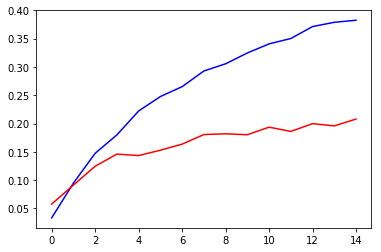

In [71]:
scores3 = model.evaluate(X_valid, Y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

In [72]:
print("Accuracy: %.2f%%" % (scores3[1]*100))

Accuracy: 20.80%


## We see that Global Pooling reduces how overfit the model becomes! Decrease in train accuracy with not much decrease in the test accuracy.

In [ ]:
#Lets add another fully-connected layer

In [79]:
from keras.layers import GlobalAveragePooling2D
base_model = VGG19(weights='imagenet', 
                   include_top=False, 
                   input_shape=(im_size, im_size, 3))

In [81]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_class, activation='softmax')(x)

In [82]:
# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
#model.summary()

In [83]:
#Change checkpoint filepath and now only save the best val accuracy (not multi)
filepath="JH_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [84]:
t0=time.time()
log3 = model.fit(X_train, Y_train, 
                 epochs=15,
                 callbacks=callbacks_list,
                 validation_data=(X_valid, Y_valid), 
                 verbose=1)
t1=time.time()
print(t1-t0," seconds")

Train on 7155 samples, validate on 3067 samples
Epoch 1/15
7155/7155 [==============================] - 62s 9ms/step - loss: 4.8259 - acc: 0.0528 - val_loss: 3.9196 - val_acc: 0.1213

Epoch 00001: val_acc improved from -inf to 0.12129, saving model to JH_weights.best.hdf5
Epoch 2/15
7155/7155 [==============================] - 61s 9ms/step - loss: 3.7919 - acc: 0.1470 - val_loss: 3.5892 - val_acc: 0.1620

Epoch 00002: val_acc improved from 0.12129 to 0.16205, saving model to JH_weights.best.hdf5
Epoch 3/15
7155/7155 [==============================] - 61s 9ms/step - loss: 3.3668 - acc: 0.2043 - val_loss: 3.4726 - val_acc: 0.1839

Epoch 00003: val_acc improved from 0.16205 to 0.18389, saving model to JH_weights.best.hdf5
Epoch 4/15
7155/7155 [==============================] - 62s 9ms/step - loss: 3.0931 - acc: 0.2607 - val_loss: 3.3080 - val_acc: 0.2002

Epoch 00004: val_acc improved from 0.18389 to 0.20020, saving model to JH_weights.best.hdf5
Epoch 5/15
7155/7155 [=====================

Accuracy: 22.27%
CNN Error: 77.73%


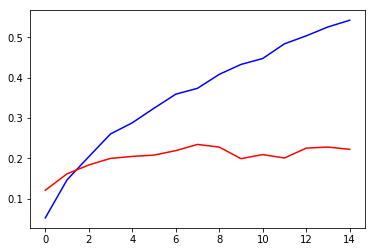

In [85]:
scores3 = model.evaluate(X_valid, Y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

In [ ]:
# Now we chose to train the top

In [86]:
#visualize the layers to choose layers to unfreeze
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_9
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [89]:
for layer in model.layers[:17]:
   layer.trainable = False
for layer in model.layers[17:]:
   layer.trainable = True

In [90]:
# we need to recompile the model for these modifications to take effect
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
#model.summary()

In [91]:
#Change checkpoint filepath and now only save the best val accuracy (not multi)
filepath="JH2_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [93]:
t0=time.time()
log3 = model.fit(X_train, Y_train, 
                 epochs=150,
                 callbacks=callbacks_list,
                 validation_data=(X_valid, Y_valid), 
                 verbose=1)
t1=time.time()
print(t1-t0," seconds")

Train on 7155 samples, validate on 3067 samples
Epoch 1/150
7155/7155 [==============================] - 71s 10ms/step - loss: 2.6196 - acc: 0.2904 - val_loss: 3.3225 - val_acc: 0.2097

Epoch 00001: val_acc improved from 0.16726 to 0.20965, saving model to JH2_weights.best.hdf5
Epoch 2/150
7155/7155 [==============================] - 71s 10ms/step - loss: 2.3157 - acc: 0.3498 - val_loss: 3.5651 - val_acc: 0.1901

Epoch 00002: val_acc did not improve from 0.20965
Epoch 3/150
7155/7155 [==============================] - 72s 10ms/step - loss: 2.0242 - acc: 0.4165 - val_loss: 3.5702 - val_acc: 0.2022

Epoch 00003: val_acc did not improve from 0.20965
Epoch 4/150
7155/7155 [==============================] - 72s 10ms/step - loss: 1.7697 - acc: 0.4784 - val_loss: 3.7212 - val_acc: 0.2253

Epoch 00004: val_acc improved from 0.20965 to 0.22530, saving model to JH2_weights.best.hdf5
Epoch 5/150
7155/7155 [==============================] - 72s 10ms/step - loss: 1.5574 - acc: 0.5208 - val_loss: 3.

7155/7155 [==============================] - 72s 10ms/step - loss: 0.0684 - acc: 0.9806 - val_loss: 6.8382 - val_acc: 0.2661

Epoch 00085: val_acc did not improve from 0.27584
Epoch 86/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0800 - acc: 0.9734 - val_loss: 6.9691 - val_acc: 0.2648

Epoch 00086: val_acc did not improve from 0.27584
Epoch 87/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0730 - acc: 0.9753 - val_loss: 7.0114 - val_acc: 0.2579

Epoch 00087: val_acc did not improve from 0.27584
Epoch 88/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0737 - acc: 0.9782 - val_loss: 7.2229 - val_acc: 0.2445

Epoch 00088: val_acc did not improve from 0.27584
Epoch 89/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0554 - acc: 0.9813 - val_loss: 6.6642 - val_acc: 0.2648

Epoch 00089: val_acc did not improve from 0.27584
Epoch 90/150
7155/7155 [==============================] - 72s 10ms/s

7155/7155 [==============================] - 72s 10ms/step - loss: 0.0702 - acc: 0.9800 - val_loss: 6.9786 - val_acc: 0.2739

Epoch 00128: val_acc did not improve from 0.28432
Epoch 129/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0606 - acc: 0.9823 - val_loss: 7.3734 - val_acc: 0.2501

Epoch 00129: val_acc did not improve from 0.28432
Epoch 130/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0563 - acc: 0.9841 - val_loss: 7.5901 - val_acc: 0.2478

Epoch 00130: val_acc did not improve from 0.28432
Epoch 131/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0324 - acc: 0.9898 - val_loss: 6.8032 - val_acc: 0.2657

Epoch 00131: val_acc did not improve from 0.28432
Epoch 132/150
7155/7155 [==============================] - 72s 10ms/step - loss: 0.0431 - acc: 0.9881 - val_loss: 7.3876 - val_acc: 0.2485

Epoch 00132: val_acc did not improve from 0.28432
Epoch 133/150
7155/7155 [==============================] - 72s 1

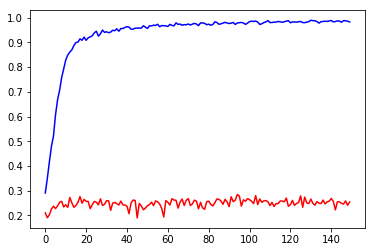

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

In [96]:
# serialize model to JSON
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
model_json = model.to_json()
with open("modelVGGJH_f.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

Saved model to disk


# Model name: "modelVGGJH_f.json"
# Model Weights: "JH2_weights.best.hdf5"

In [100]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
# load json and create model
json_file = open('modelVGGJH_f.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [101]:
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("JH2_weights.best.hdf5")
print("Loaded model from disk")

Loaded model from disk


In [102]:
loaded_model=model

In [103]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [104]:
scores = model.evaluate(X_valid, Y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))
print("CNN Error: %.2f%%" % (100-scores3[1]*100))


Accuracy: 25.40%
CNN Error: 74.60%


# Per-Class Classification Report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(Y_valid, axis=1) # Convert one-hot to index
y_pred = model.predict(X_valid)


# Data augmentation would help us more with this overfitting. In the future I will further look into that path

In [114]:
preds = model.predict(x_test, verbose=1)

10357/10357 [==============================] - 61s 6ms/step


In [131]:
sub = pd.DataFrame(preds)
# Set column names to those generated by the one-hot encoding earlier
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,2.881818e-16,2.908174e-08,1.485948e-15,5.260022e-26,1.312033e-18,7.904721e-20,1.966133e-19,1.035951e-15,1.714397e-06,...,1.835488e-16,7.433293e-13,6.715178e-09,1.387655e-12,1.615858e-11,1.703199e-12,1.428662e-16,2.761828e-13,5.402162e-20,8.985655e-14
1,00102ee9d8eb90812350685311fe5890,5.471807e-20,8.622066e-27,2.167321e-20,4.712811e-31,3.252753e-27,6.964546e-25,1.497292e-25,1.874541e-16,8.246404e-26,...,3.175559e-21,2.045968e-12,1.412971e-24,7.501035e-30,3.237801e-25,3.618380e-36,1.769004e-19,6.582500e-22,6.630120e-25,3.445946e-28
2,0012a730dfa437f5f3613fb75efcd4ce,7.951010e-12,9.640616e-01,1.256216e-18,9.964610e-15,8.002052e-16,2.294173e-25,7.634658e-14,9.093982e-15,5.708836e-20,...,2.025825e-14,6.476934e-20,1.358308e-12,1.647347e-16,3.798201e-12,7.184224e-15,7.401529e-14,8.591923e-17,1.825602e-07,4.933122e-15
3,001510bc8570bbeee98c8d80c8a95ec1,1.456681e-10,4.009769e-06,1.768721e-12,5.467740e-12,7.499619e-08,4.626663e-18,8.390158e-16,1.537492e-04,7.523833e-08,...,4.152906e-09,5.165719e-11,5.565976e-05,3.105618e-08,2.574121e-05,3.486394e-13,2.834392e-13,3.544496e-06,8.353056e-11,3.038352e-10
4,001a5f3114548acdefa3d4da05474c2e,2.913965e-04,3.322342e-09,6.447556e-08,2.621117e-15,1.625657e-24,1.105635e-09,1.461371e-07,6.597204e-24,1.068852e-16,...,3.059969e-15,1.321735e-17,8.410933e-22,2.349734e-22,3.284758e-16,1.213148e-11,6.294596e-15,1.055343e-19,5.223358e-17,2.032516e-12


In [130]:
sub.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,2.881818e-16,2.908174e-08,1.485948e-15,5.260022e-26,1.312033e-18,7.904721e-20,1.966133e-19,1.035951e-15,1.714397e-06,...,1.835488e-16,7.433293e-13,6.715178e-09,1.387655e-12,1.615858e-11,1.703199e-12,1.428662e-16,2.761828e-13,5.402162e-20,8.985655e-14
1,00102ee9d8eb90812350685311fe5890,5.471807e-20,8.622066e-27,2.167321e-20,4.712811e-31,3.252753e-27,6.964546e-25,1.497292e-25,1.874541e-16,8.246404e-26,...,3.175559e-21,2.045968e-12,1.412971e-24,7.501035e-30,3.237801e-25,3.618380e-36,1.769004e-19,6.582500e-22,6.630120e-25,3.445946e-28
2,0012a730dfa437f5f3613fb75efcd4ce,7.951010e-12,9.640616e-01,1.256216e-18,9.964610e-15,8.002052e-16,2.294173e-25,7.634658e-14,9.093982e-15,5.708836e-20,...,2.025825e-14,6.476934e-20,1.358308e-12,1.647347e-16,3.798201e-12,7.184224e-15,7.401529e-14,8.591923e-17,1.825602e-07,4.933122e-15
3,001510bc8570bbeee98c8d80c8a95ec1,1.456681e-10,4.009769e-06,1.768721e-12,5.467740e-12,7.499619e-08,4.626663e-18,8.390158e-16,1.537492e-04,7.523833e-08,...,4.152906e-09,5.165719e-11,5.565976e-05,3.105618e-08,2.574121e-05,3.486394e-13,2.834392e-13,3.544496e-06,8.353056e-11,3.038352e-10
4,001a5f3114548acdefa3d4da05474c2e,2.913965e-04,3.322342e-09,6.447556e-08,2.621117e-15,1.625657e-24,1.105635e-09,1.461371e-07,6.597204e-24,1.068852e-16,...,3.059969e-15,1.321735e-17,8.410933e-22,2.349734e-22,3.284758e-16,1.213148e-11,6.294596e-15,1.055343e-19,5.223358e-17,2.032516e-12


In [132]:
sub.to_csv('JHSub.csv', index = False)

In [116]:
float_formatter = lambda x: "%.2f" % x

In [120]:
print(preds.shape)

(10357, 120)
